In [148]:
import pandas as pd

# Load the dataset (replace 'your_dataset.csv' with the actual file path)
data = pd.read_csv('train.csv')

# Explore the data
data.head()  # Display the first few rows

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [149]:
# Select the first 500 rows of the DataFrame
data = data.head(1000)

In [150]:
data.tail(1)

,Store,Dept,Date,Weekly_Sales,IsHoliday
999,1,7,2012-10-19,21937.45,False


In [151]:
from statsmodels.tsa.stattools import adfuller
import numpy as np

# Convert the 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Handle missing values (e.g., fill with the mean value)
data['Weekly_Sales'].fillna(data['Weekly_Sales'].mean(), inplace=True)

# Check for infinite values and handle them if needed
if np.isinf(data['Weekly_Sales']).any():
    data['Weekly_Sales'] = data['Weekly_Sales'].replace([np.inf, -np.inf], np.nan)
    data['Weekly_Sales'].fillna(data['Weekly_Sales'].mean(), inplace=True)

# Calculate ADF test p-value for 'Weekly_Sales'
result = adfuller(data['Weekly_Sales'])
adf_statistic = result[0]
p_value = result[1]
print("ADF Statistic:", adf_statistic)
print("p-value:", p_value)


ADF Statistic: -4.029053656163406
p-value: 0.0012657901654762739


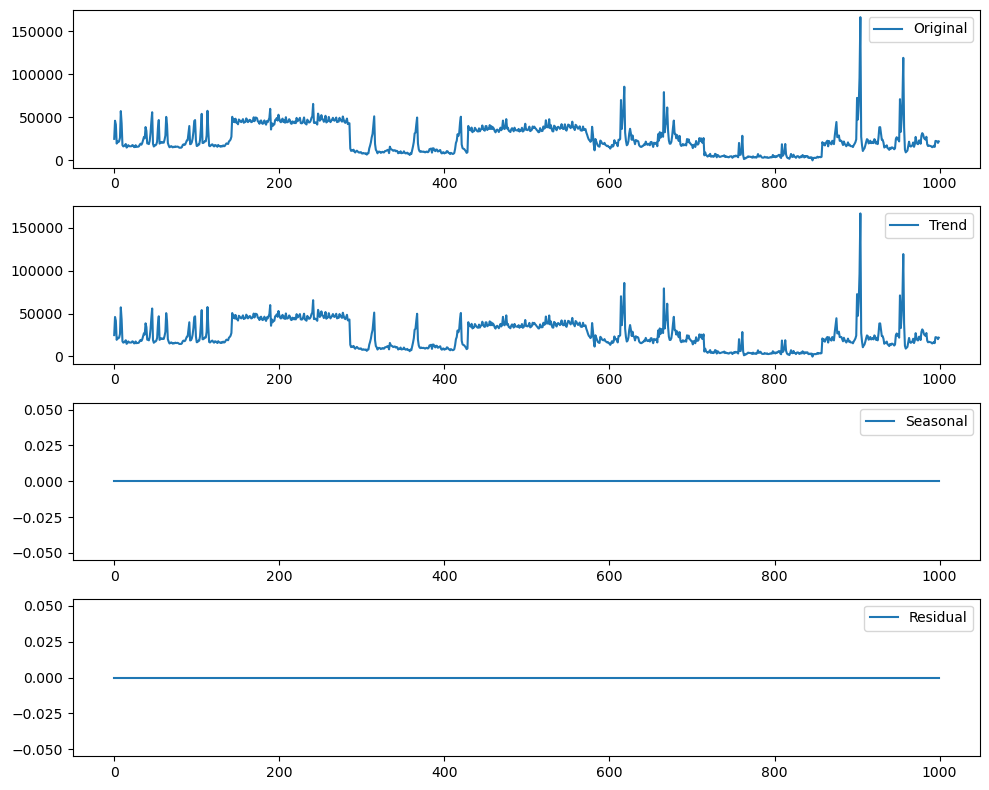

In [152]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition = seasonal_decompose(data['Weekly_Sales'], model='additive', period=1)

# Plot the decomposed components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(10, 8))
plt.subplot(411)
plt.plot(data['Weekly_Sales'], label='Original')
plt.legend()
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend()
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend()
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend()
plt.tight_layout()
plt.show()


# forcasting

In [153]:
# Assuming 'data' is your DataFrame
data = data.dropna()


In [154]:
import pandas as pd
from statsmodels.tsa.api import VAR
from statsmodels.tsa.base.datetools import dates_from_str


# Select relevant columns (features for forecasting)
features = ["Date",'Weekly_Sales', 'IsHoliday']  # Replace with your actual feature names

# Keep only the selected features
data2 = data[features]

# Convert the 'Date' column to datetime objects
data2['Date'] = pd.to_datetime(data2['Date'])

# Set 'Date' as the index
data2.set_index('Date', inplace=True)
data2.tail()


C:\Users\Master Computers\AppData\Local\Temp\ipykernel_10372\571973810.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Date'] = pd.to_datetime(data2['Date'])


,Weekly_Sales,IsHoliday
Date,,
2012-09-21,22542.44,False
2012-09-28,22343.24,False
2012-10-05,22071.39,False
2012-10-12,20212.71,False
2012-10-19,21937.45,False


In [155]:
print(data2.dtypes)
data2['IsHoliday'] = data2['IsHoliday'].astype(bool) 
print(data2.dtypes)

Weekly_Sales    float64
IsHoliday          bool
dtype: object
Weekly_Sales    float64
IsHoliday          bool
dtype: object


C:\Users\Master Computers\AppData\Local\Temp\ipykernel_10372\1499518859.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['IsHoliday'] = data2['IsHoliday'].astype(bool)


In [156]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Encode the 'IsHoliday' column
data2['IsHoliday'] = label_encoder.fit_transform(data2['IsHoliday'])


C:\Users\Master Computers\AppData\Local\Temp\ipykernel_10372\3901749747.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['IsHoliday'] = label_encoder.fit_transform(data2['IsHoliday'])


C:\Users\Master Computers\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Master Computers\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


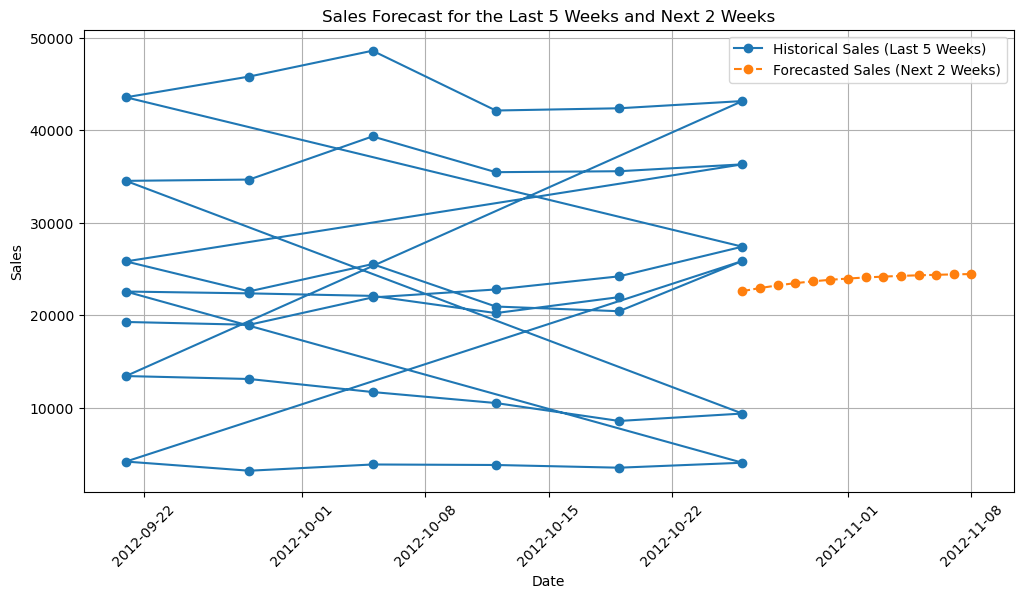

In [157]:
from statsmodels.tsa.api import VAR
# Create and fit the VAR model
model = VAR(data2)
results = model.fit()

# Forecast for the next 2 weeks (14 days)
forecast = results.forecast(y=data2.values, steps=14)

# Create a date range for the next 2 weeks starting from '2012-10-19'
next_two_weeks_dates = pd.date_range(start='2012-10-26', periods=14)

# Create a DataFrame for the forecast
forecast_df = pd.DataFrame(forecast, columns=data2.columns, index=next_two_weeks_dates)

# Calculate the date range for the last 5 weeks
last_five_weeks_start = data['Date'].max() - pd.DateOffset(weeks=5)
last_five_weeks_end = data['Date'].max()

# Filter the historical data for the last 5 weeks
historical_data = data[(data['Date'] >= last_five_weeks_start) & (data['Date'] <= last_five_weeks_end)]

# Plot the 'Weekly_Sales' column for the last 5 weeks and forecast for the next 2 weeks
plt.figure(figsize=(12, 6))
plt.plot(historical_data['Date'], historical_data['Weekly_Sales'], label='Historical Sales (Last 5 Weeks)', marker='o')
plt.plot(forecast_df.index, forecast_df['Weekly_Sales'], label='Forecasted Sales (Next 2 Weeks)', linestyle='--', marker='o')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Forecast for the Last 5 Weeks and Next 2 Weeks')
plt.legend()
plt.grid(True)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()



In [158]:
data


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
995,1,7,2012-09-21,22542.44,False
996,1,7,2012-09-28,22343.24,False
997,1,7,2012-10-05,22071.39,False
998,1,7,2012-10-12,20212.71,False
